# IS460-G2 Machine Learning & Applications

## Project Topic: Classification and Prediction of Pneumonia from Chest X-Ray Images

#### Group 7: Shaun, Shan Mei, Xiao Xiao, Xiao Fang, Matthew, Tun Hao

 Following the Severe Pneumonia clusters that raised questions on accuracy and precision of pneumonia diagnosis during the COVID pandemic, this project aims to accurately identify and diagnose pneumonia patients through image classification and explore other methods of building machine learning algorithms to solve the problem.
 
(https://www.straitstimes.com/singapore/health/all-pneumonia-patients-in-public-hospitals-here-being-tested-for-coronavirus-moh) 

### Install Packages

In [29]:
# # Run Once
# !pip install opencv-python
# !pip install tensorflow

### Import Packages

In [9]:
import os
import cv2
from tqdm import tqdm
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import keras 
from keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [17]:
path = "chest_xray"
folders = ['test','train','val']

pd.DataFrame(os.listdir(path),columns=['Files'])

,Files
0,chest_xray
1,test
2,train
3,val
4,__MACOSX


In [18]:
# View Image Count in Folders
dict_={'train':[],'test':[],'val':[]}
for i in tqdm(folders):
    path_=os.path.join(path,i)
    for j in os.listdir(path_):
        dict_[i].append(len(os.listdir(os.path.join(path_,j))))
pd.DataFrame(dict_,index=os.listdir(path_))

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 127.53it/s]


,train,test,val
NORMAL,1341,234,8
PNEUMONIA,3875,390,8


In [21]:
# Define Function to Identify Image Sizes
def Size(folder):
    size=[]
    path_=os.path.join(path,folder)
    for i in tqdm(os.listdir(path_)):
        path2=os.path.join(path_,i)
        for j in os.listdir(path2):
            img=cv2.imread(os.path.join(path2,j))
            size.append(img.shape)
    return pd.Series(size)

In [22]:
# View Image Sizes in Each Folder
print("Size of train: ", Size('train')); print("Size of test: ", Size('test')); print("Size of val: ",Size('val'))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:00<00:00, 30.11s/it]


Size of train:  0       (1858, 2090, 3)
1       (1152, 1422, 3)
2       (1434, 1810, 3)
3       (1279, 1618, 3)
4       (1125, 1600, 3)
             ...       
5211     (882, 1414, 3)
5212     (696, 1256, 3)
5213     (856, 1152, 3)
5214     (728, 1248, 3)
5215     (784, 1176, 3)
Length: 5216, dtype: object


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.27s/it]


Size of test:  0      (1317, 1857, 3)
1      (1509, 2111, 3)
2      (1837, 2031, 3)
3      (1326, 1663, 3)
4      (1818, 2053, 3)
            ...       
619     (856, 1120, 3)
620     (856, 1064, 3)
621    (1024, 1400, 3)
622    (1016, 1264, 3)
623    (1122, 1704, 3)
Length: 624, dtype: object


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.71it/s]

Size of val:  0     (1416, 1776, 3)
1     (1040, 1272, 3)
2     (1416, 1736, 3)
3      (928, 1288, 3)
4     (1104, 1240, 3)
5     (1104, 1328, 3)
6     (1225, 1632, 3)
7     (1302, 1564, 3)
8       (592, 968, 3)
9      (712, 1072, 3)
10     (664, 1152, 3)
11     (944, 1416, 3)
12     (864, 1256, 3)
13     (656, 1016, 3)
14     (952, 1192, 3)
15    (1128, 1664, 3)
dtype: object


### Data Pre-Processing

In our Image Classification problem, Data Pre-Processing involves:  
  
- Rescaling Colors in Images 
- Resiziing Images
- Normalizing Pixel Values

In [25]:
# Pre-Process Dataset
Size=80
images=[]
labels=[]

def load():
    global images
    global labels
    
    for folder in tqdm(folders):
        path_=os.path.join(path,folder)
        
        for files in os.listdir(path_):
            path2=os.path.join(path_,files)
            
            for img in os.listdir(path2):
                # Read Images
                image=cv2.imread(os.path.join(path2,img))
                # Convert BGR to RGB Color Codes
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                # Resize Images
                image=cv2.resize(image,(Size,Size))
                # Normalize Pixel Values (Scaling to [0, 1])
                image=image/255.0
                images.append(image)
                labels.append(files)      
load()

images=np.array(images)
labels=np.array(labels)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:06<00:00, 22.30s/it]


In [27]:
# Overview of Pre-Processed Data
print('Images Shape :',images.shape); print('Labels Shape :',labels.shape)

Images Shape : (5856, 80, 80, 3)
Labels Shape : (5856,)


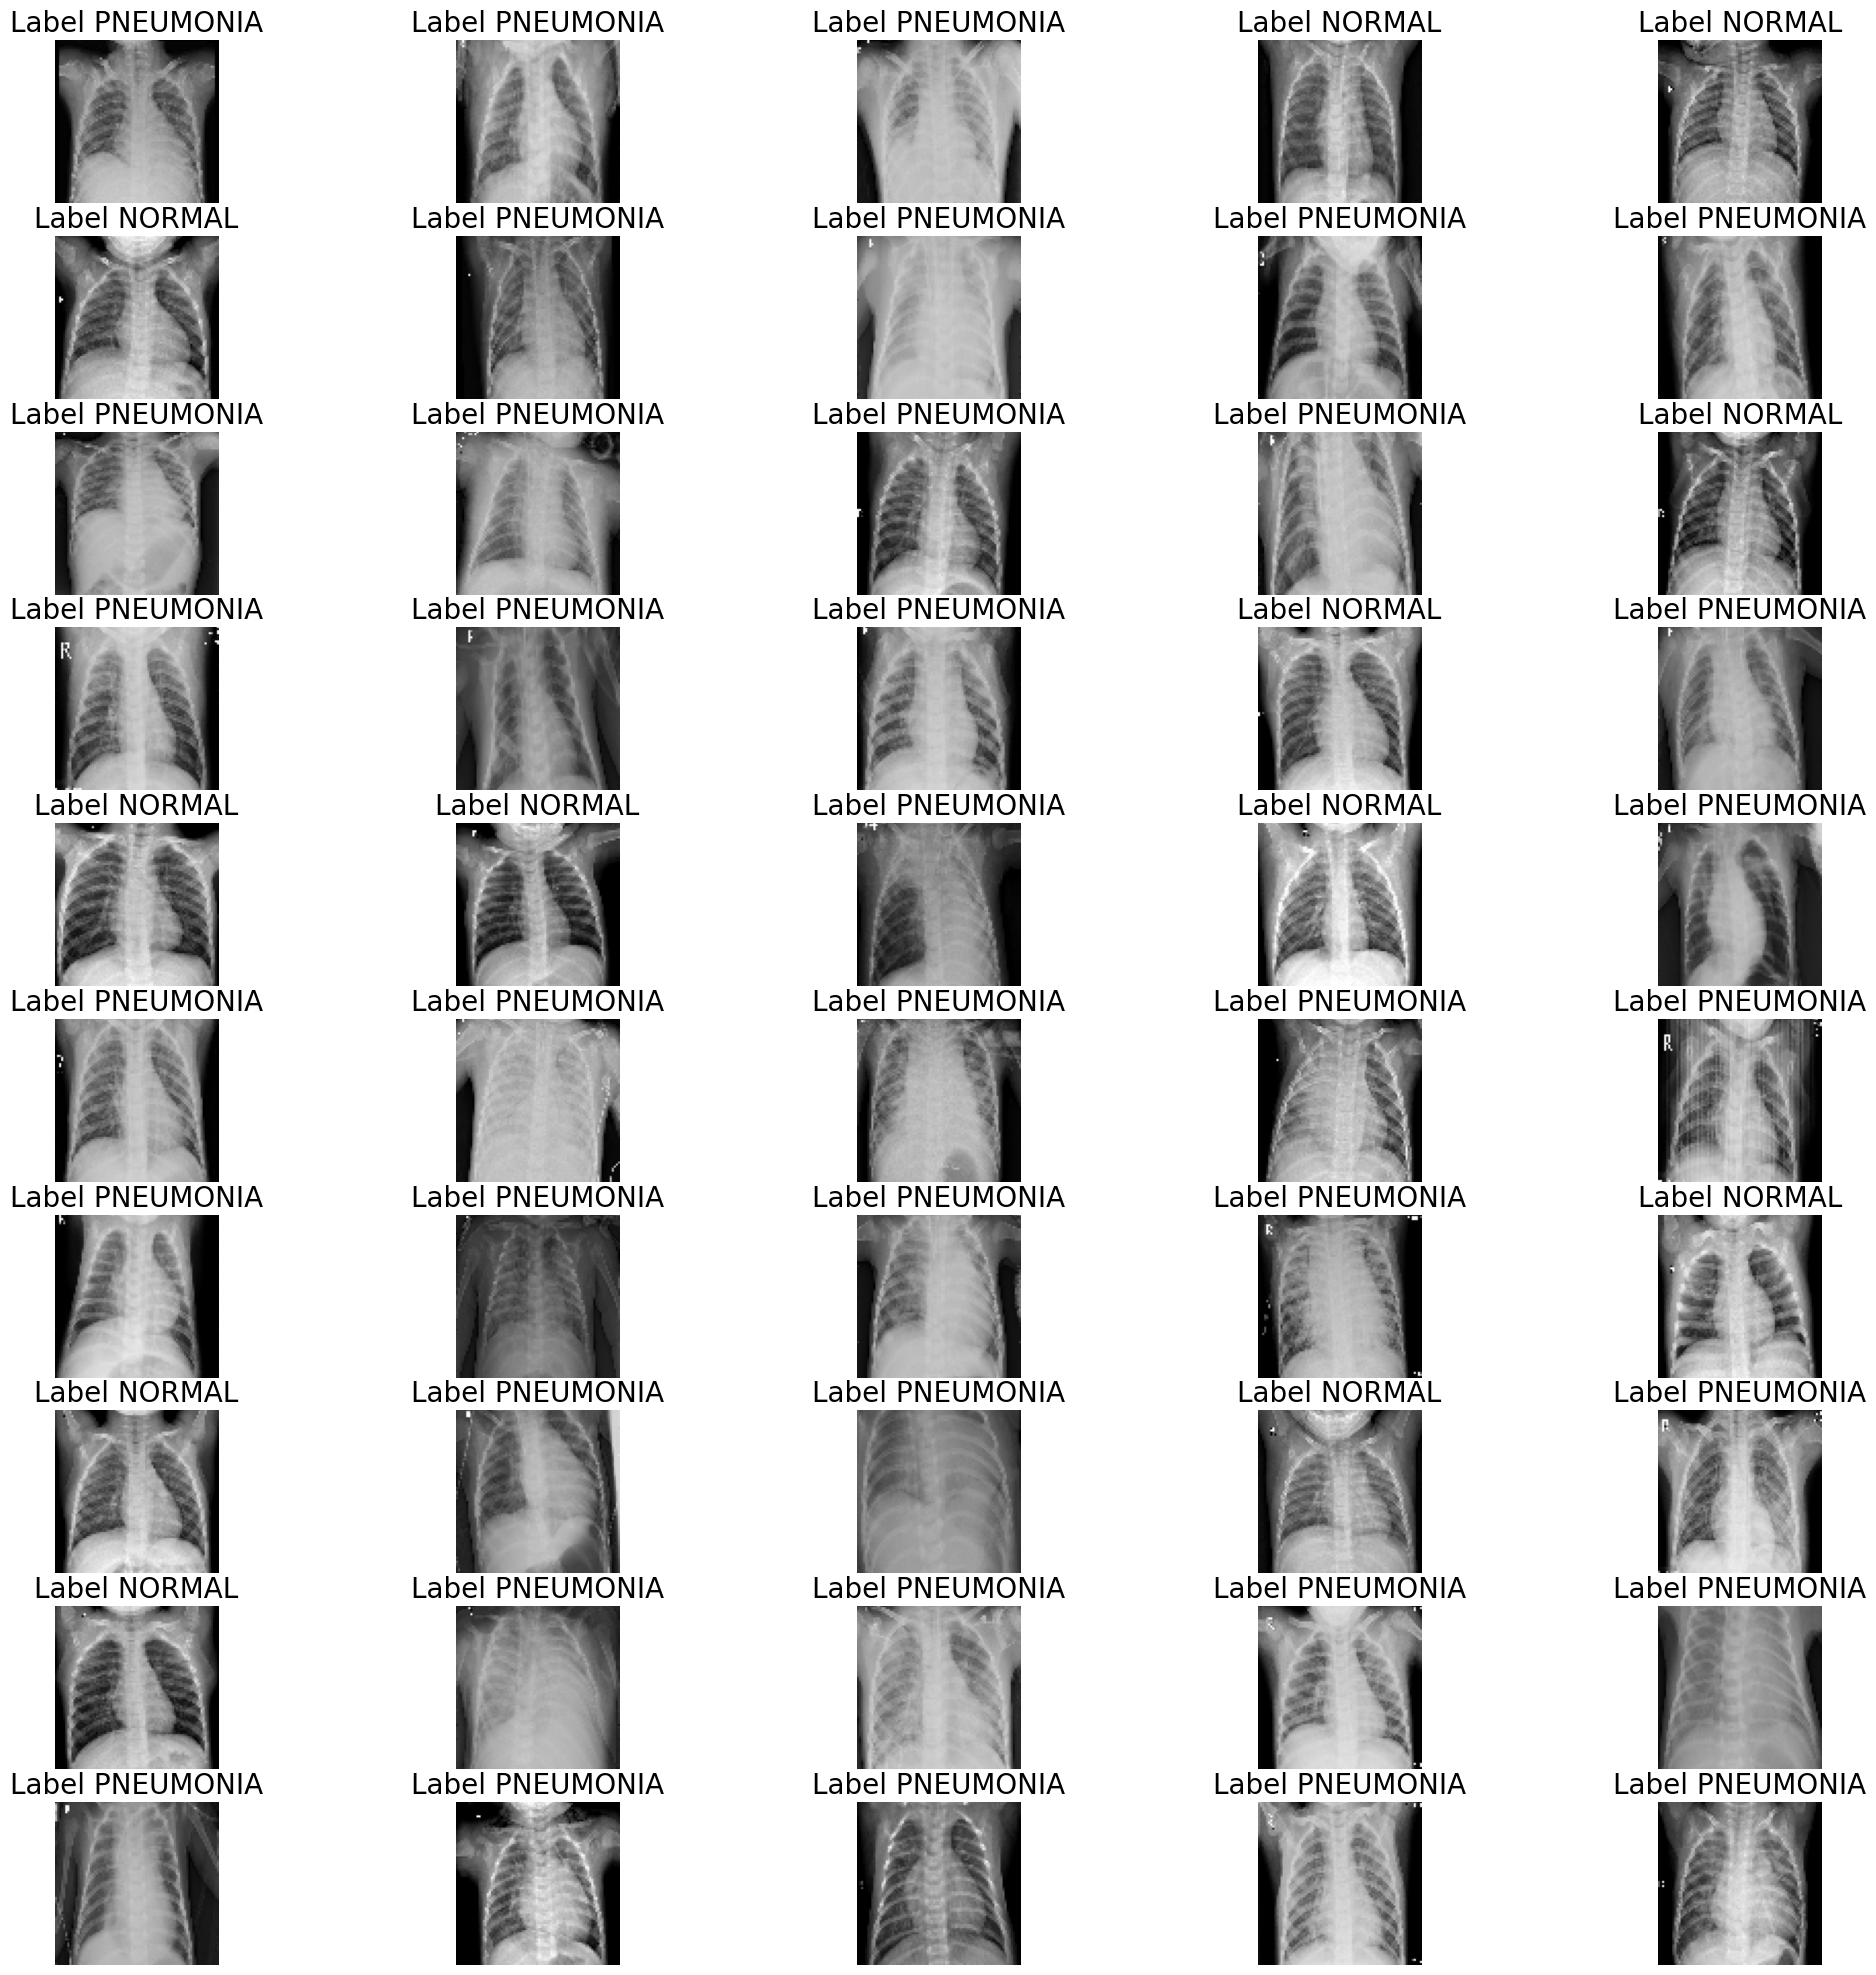

In [28]:
# Plot Pre-Processed Data
plt.figure(figsize=(25,25))
x = 1
for i in np.random.randint(0,len(images),50):
    plt.subplot(10, 5, x)
    plt.imshow(images[i])
    plt.title(f'Label {labels[i]}', fontsize=20)
    plt.axis('off')    
    x += 1

In [30]:
# Label Encode the Labels
label=LabelEncoder()
labels=label.fit_transform(labels)

labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)